In [34]:
import torch
print("CUDA Available:", torch.cuda.is_available())
print("Device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")


CUDA Available: True
Device: NVIDIA GeForce RTX 2060


In [ ]:
# from ultralytics import YOLO
# model = YOLO("C:/ML_Project/runs/detect/train10/weights/best.pt")
# model.train(data="data.yaml", epochs=200, imgsz=640, freeze=True, auto_augment=True)


New https://pypi.org/project/ultralytics/8.3.155 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.152  Python-3.10.11 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=True, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=C:/ML_Project/runs/detect/train10/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train11, nbs=64, nm

train: Scanning C:\ML_Project\train\labels.cache... 2784 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2784/2784 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [1]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("C:/ML_Project/runs/detect/train16/weights/best.pt")  # Adjust path if needed


In [3]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
%matplotlib inline

Ultralytics 8.3.152  Python-3.10.11 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
val: Fast image access  (ping: 0.10.0 ms, read: 713.1137.2 MB/s, size: 168.5 KB)


val: Scanning C:\ML_Project\valid\labels.cache... 220 images, 0 backgrounds, 0 corrupt: 100%|██████████| 220/220 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.55it/s]


                   all        220        268      0.995      0.774      0.887      0.695
Speed: 1.1ms preprocess, 29.2ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs\detect\val3


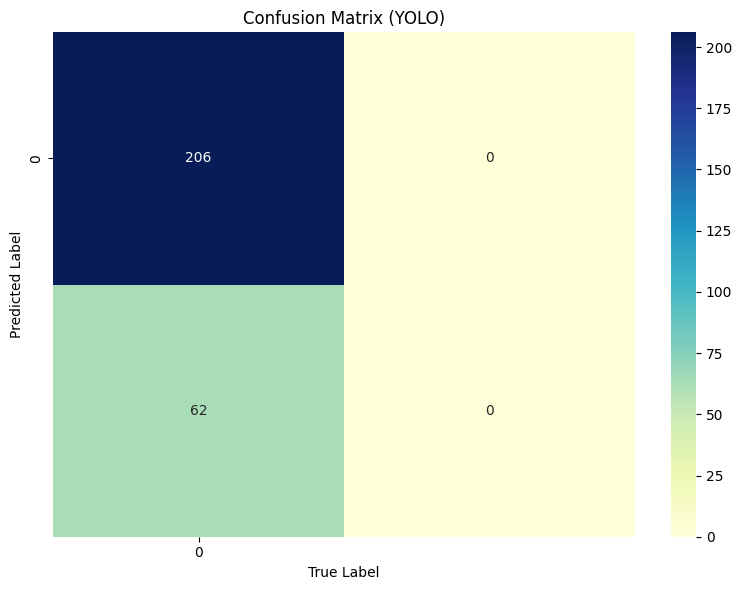

In [8]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Run validation

results = model.val(save=False)  # don't overwrite PNG files

# Extract matrix
cm = results.confusion_matrix
matrix = cm.matrix.astype(int)
labels = results.names

# Plot manually
plt.figure(figsize=(8, 6))
sns.heatmap(
    matrix,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    xticklabels=labels.values(),
    yticklabels=labels.values()
)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix (YOLO)")
plt.tight_layout()

# ⬇️ This is critical in Jupyter to force the figure to display
plt.show()




In [25]:
import cv2
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model.predict(frame, verbose=False, conf=0.5, imgsz=640)

    annotated_frame = results[0].plot()

    cv2.imshow("YOLOv11 Live", annotated_frame)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()


In [9]:
!pip install streamlit


     ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
      --------------------------------------- 0.2/10.1 MB 4.0 MB/s eta 0:00:03
     --- ------------------------------------ 0.8/10.1 MB 9.0 MB/s eta 0:00:02
     -------- ------------------------------- 2.2/10.1 MB 13.9 MB/s eta 0:00:01
     ----------- ---------------------------- 2.9/10.1 MB 14.4 MB/s eta 0:00:01
     --------------- ------------------------ 4.0/10.1 MB 15.9 MB/s eta 0:00:01
     -------------------- ------------------- 5.2/10.1 MB 16.5 MB/s eta 0:00:01
     -------------------------- ------------- 6.7/10.1 MB 17.9 MB/s eta 0:00:01
     ------------------------------------- -- 9.4/10.1 MB 22.4 MB/s eta 0:00:01
     --------------------------------------  10.0/10.1 MB 22.2 MB/s eta 0:00:01
     --------------------------------------- 10.1/10.1 MB 20.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/25.8 MB ? eta -:--:--
     -- ------------------------------------- 1.6/25.8 MB 


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import streamlit as st
import cv2
from ultralytics import YOLO
import tempfile
import os
import numpy as np

# Load model
model = YOLO("C:/ML_Project/runs/detect/train16/weights/best.pt")

st.title(" Real-Time Knife Detection with YOLOv11")

# Webcam toggle
run = st.checkbox('Start Camera')

# Display confidence slider
conf_threshold = st.slider("Confidence Threshold", 0.0, 1.0, 0.5, 0.01)

# Start webcam when checkbox is checked
FRAME_WINDOW = st.image([])

if run:
    cap = cv2.VideoCapture(1)

    st.write("Press **Stop Camera** to end.")

    while run:
        ret, frame = cap.read()
        if not ret:
            st.warning("Failed to capture frame. Exiting...")
            break

        # Run YOLO model
        results = model.predict(frame, conf=conf_threshold, verbose=False)

        # Plot predictions
        annotated_frame = results[0].plot()

        # Convert BGR (OpenCV) to RGB (Streamlit uses RGB)
        annotated_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

        FRAME_WINDOW.image(annotated_frame)

        # Break if checkbox unchecked
        run = st.checkbox('Start Camera', value=True)

    cap.release()
    cv2.destroyAllWindows()
else:
    st.write("Click the checkbox above to start knife detection.")


2025-07-03 19:35:47.420 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 19:35:48.225 
  command:

    streamlit run c:\ML_Project\.venv\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-03 19:35:48.227 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 19:35:48.229 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 19:35:48.229 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 19:35:48.231 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 19:35:48.233 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-03 19:35:48.235 Thread 'MainThread': missing